In [52]:
import pandas as pd
import matplotlib.pyplot as plt


subreddit = "conspiracy"
filename = f'{subreddit}_comments.csv'


In [4]:
dataframe = pd.read_csv(filename, compression='gzip')
print(f"comments in dataset: {len(dataframe)}")



comments in dataset: 10000


<bound method NDFrame.head of                 author  size
0     --Dash----Dash--     4
1             -1----1-     1
2            -Captain-     1
3                 -K9V     7
4     -Serenity---Now-     2
...                ...   ...
3834       ziplock9000     2
3835            zolloh     1
3836        zorbiburst     1
3837  zurebommenkoning     3
3838          zzz619er     2

[3839 rows x 2 columns]>

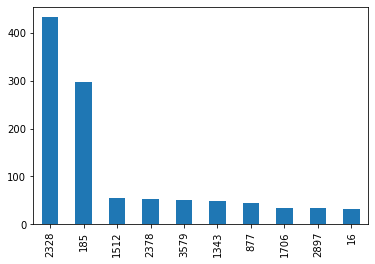

In [61]:
authors = dataframe.groupby('author', as_index=False).size()
top_authors = authors.nlargest(10, 'size')
top_authors['size'].plot.bar()
authors.head

In [70]:
authors_without_bot = authors.drop(authors.index[(authors['author'] == '[deleted]')], axis=0, inplace=False)
authors_without_bot = authors_without_bot.drop(authors_without_bot.index[(authors_without_bot['author'] == 'AutoModerator')], axis=0, inplace=False)
print(f"total number of authors: {len(authors_without_bot)}")
print(f"average number of comments per author: {authors_without_bot['size'].mean()}")
print(f"median: {authors_without_bot['size'].median()}")
#print(f"mode: {authors_without_bot['size'].mode()}")

total number of authors: 3837
average number of comments per author: 2.415689340630701
median: 1.0
mode: 0    1
Name: size, dtype: int64


number of deleted comments